# **Russia Ukrain War Sentiment Analysis**

### **Data 602: Final Project**



Russia Ukrane war took place on 24th Feburary'2022. In this notebook we have tried to analye the sentiment of the people around the world by focusing on the news which is broadcasted on this subject across the globe.
The project proceeds with the flow mentioned below:


1.   Installing and Importing the required libraries.
2.   Data scraping through pygoogle news.
3.   Data Cleaning and Data Wrangling.
4. Basic analysis on the data.
5. Sentiment Analysis on all the 3 datasets.
6. Model training through pipeline.
7. Model Training through Deep learning approach.
8. Model Training through Transformer using BERT model
9. Conclusion.
10. Future Work.



### **Installing libraries**

In [ ]:
!pip install pygooglenews
!pip install snorkel
!pip install textblob
!pip install transformers

     |████████████████████████████████| 63 kB 652 kB/s 
     |████████████████████████████████| 362 kB 10.0 MB/s 
     |████████████████████████████████| 1.2 MB 42.3 MB/s 
     |████████████████████████████████| 128 kB 63.2 MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44952 sha256=1375b600147d16eb5fdb49200155b6a215ca189245415e4976e294b5719b54bc
  Stored in directory: /root/.cache/pip/wheels/29/bf/46/b4a597d435d3aee6c2fa583824897336d65abf13ebe3405b70
Successfully built feedparser
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

     |████████████████████████████████| 4.2 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 42.2 MB/s 
     |████████████████████████████████| 596 kB 68.6 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## **Importing Libraries**

In [100]:
#Core
import pandas as pd
import numpy as np
import io
#Web Scraping library
from pygooglenews import GoogleNews
#HTML
from IPython.display import HTML, Image
import datetime
# Data Visualization
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
#Word Cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
#Snorkel
from snorkel.labeling import LabelingFunction
import re
from snorkel.preprocess import preprocessor
from textblob import TextBlob
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model import LabelModel
from snorkel.labeling import LFAnalysis
from snorkel.labeling import filter_unlabeled_dataframe
from snorkel.labeling import labeling_function
#NLP packages
import spacy
from nltk.corpus import stopwords
import string
import nltk
import nltk.tokenize
punc = string.punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#Supervised learning
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

##Deep learning libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from unicodedata import digit

# Misc.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 576x504 with 0 Axes>

## **Data Scraping from Web using pygoogle news**

### **Scraping the 3 months news prior to the war**

In [ ]:
#Scraping the 3 months news prior to the war
gn = GoogleNews()

def get_news(search):
    stories = []
    start_date = datetime.date(2021,11,22)
    end_date = datetime.date(2022,2,22)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']
      
        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_news('Russia-Ukraine')
# before_war = pd.DataFrame(get_news('Russia-Ukraine'))

[{'link': 'https://www.cnn.com/2021/11/22/politics/us-considering-weaponry-ukraine/index.html',
  'published': 'Tue, 23 Nov 2021 08:00:00 GMT',
  'title': 'US considering sending extra weaponry to Ukraine as fears mount over potential Russian invasion - CNN'},
 {'link': 'https://abcnews.go.com/International/wireStory/russia-rejects-western-concerns-ukraine-smokescreen-81328108',
  'published': 'Mon, 22 Nov 2021 08:00:00 GMT',
  'title': 'Russia rejects Western concerns about Ukraine as smokescreen - ABC News'},
 {'link': 'https://nypost.com/2021/11/22/ukraine-holds-drills-after-general-warns-of-russian-attack/',
  'published': 'Mon, 22 Nov 2021 08:00:00 GMT',
  'title': 'Ukraine holds new drills after top general warns of Russian attack in 2022 - New York Post'},
 {'link': 'https://www.express.co.uk/news/science/1522904/russia-ukraine-invasion-putin-biden-space-missile-test-asat-nord-stream-2',
  'published': 'Mon, 22 Nov 2021 08:00:00 GMT',
  'title': 'Russia’s Ukraine invasion date p

###**Scraping the news from Feburary 24th, when the war started to till date**

In [ ]:
#Scraping the news from Feburary 24th, when the war started to till date
import datetime

gn = GoogleNews()

def get_war_news(search):
    stories = []
    start_date = datetime.date(2022,2,24)
    end_date = datetime.date(2022,5,11)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_war_news('Russia-Ukraine')
# war = pd.DataFrame(get_war_news('Russia-Ukraine'))

[{'link': 'https://apnews.com/article/russia-ukraine-putin-attack-a05e7c4563ac94b963134bba83187d46',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Russia presses invasion to outskirts of Ukrainian capital - The Associated Press - en Español'},
 {'link': 'https://www.nbcnews.com/news/world/russia-launches-attacks-key-ukrainian-cities-rcna17482',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Russia invades Ukraine on multiple fronts; U.S. and allies hit back with sanctions - NBC News'},
 {'link': 'https://www.usnews.com/news/best-countries/articles/2022-02-24/explainer-why-did-russia-invade-ukraine',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'EXPLAINER: Why Did Russia Invade Ukraine? - U.S. News & World Report'},
 {'link': 'https://www.nytimes.com/live/2022/02/24/world/russia-ukraine-putin',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Putin’s Forces Attack Ukraine - The New York Times'},
 {'link': 'https://www.newyorker.com/boo

### **Country wise News**
Here we are zooming into 4 countries like US, UK, Canada and India. We are gathering the news from these four countries and analysing their input on the Russia -Ukraine war and how the business relationships are impacted due to the war with Russia.

### **United States News, since the invasion took place till date**


In [ ]:
gn = GoogleNews(lang='en', country = 'US')

def get_US_news(search):
    stories = []
    start_date = datetime.date(2022,2,24)
    end_date = datetime.date(2022,5,13)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_US_news('Russia-Ukraine-US relationship')

[{'link': 'https://www.cfr.org/in-brief/why-putins-war-ukraine-miscalculation',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Why Putin’s War With Ukraine Is a Miscalculation - Council on Foreign Relations'},
 {'link': 'https://www.usatoday.com/story/news/world/2022/02/24/vladimir-putin-russia-allies-ukraine/6921212001/',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Russia allies and neighboring nations remain quiet during Ukraine war - USA TODAY'},
 {'link': 'https://www.aljazeera.com/news/2022/2/24/ukraine-breaks-diplomatic-ties-with-russia',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Ukraine cuts diplomatic ties with Russia after invasion - Al Jazeera English'},
 {'link': 'https://www.businessinsider.com/biden-invasion-of-ukraine-marks-complete-rupture-in-us-russia-relations-2022-2',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': "Biden: invasion of Ukraine marks 'complete rupture' in US-Russia relations - Business Insider"},

### **United Kingdom News, since the invasion took place till date**

In [ ]:
#country = UK

gn = GoogleNews(lang='en', country = 'UK')

def get_UK_news(search):
    stories = []
    start_date = datetime.date(2022,2,24)
    end_date = datetime.date(2022,5,13)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_UK_news('Russia-Ukraine-United Kigdom relationship')

[{'link': 'https://www.politico.eu/podcast/russia-and-britain-a-brief-history-from-navarino-to-ukraine/',
  'published': 'Fri, 25 Feb 2022 08:00:00 GMT',
  'title': 'Russia and Britain — A brief history, from Navarino to Ukraine - POLITICO Europe'},
 {'link': 'https://www.telegraph.co.uk/politics/2022/02/24/boris-johnson-russia-ukraine-joe-biden-liz-truss-cobra/',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': "PM unveils 'largest and most severe economic sanctions Russia has ever seen' - The Telegraph"},
 {'link': 'https://www.washingtonpost.com/world/2022/02/24/world-reaction-russia-ukraine-attack/',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': "Global leaders from EU and NATO to China react to Russia's attack on Ukraine - The Washington Post"},
 {'link': 'https://www.cnbc.com/2022/02/24/china-refuses-to-call-attack-on-ukraine-an-invasion-blames-us.html',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'China refuses to call Russian attack on Ukra

### **Canada News, since the invasion took place till date**

In [ ]:
#Country: Canada
gn = GoogleNews(lang='en', country = 'Canada')

def get_CA_news(search):
    stories = []
    start_date = datetime.date(2022,2,24)
    end_date = datetime.date(2022,5,13)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_CA_news('Russia-Ukraine-canada-relationship')

[{'link': 'https://pm.gc.ca/en/news/news-releases/2022/02/24/canada-announces-additional-measures-support-ukraine',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Canada announces additional measures to support Ukraine - Prime Minister of Canada'},
 {'link': 'https://www.thestar.com/news/world/2022/02/24/russia-ukraine-updates-canada-world-february-24.html',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'Latest on Russia-Ukraine: Russian forces advance to outskirts of Ukrainian capital - Toronto Star'},
 {'link': 'https://www.wilsoncenter.org/article/world-reaction-invasion-ukraine',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'World Reaction to the Invasion of Ukraine - Wilson Center'},
 {'link': 'https://www.whitehouse.gov/briefing-room/statements-releases/2022/02/24/fact-sheet-joined-by-allies-and-partners-the-united-states-imposes-devastating-costs-on-russia/',
  'published': 'Thu, 24 Feb 2022 08:00:00 GMT',
  'title': 'FACT SHEET: Joined by

### **India News, since the invasion took place till date**

In [ ]:
#country = India
gn = GoogleNews(lang='en', country = 'India')

def get_Ind_news(search):
    stories = []
    start_date = datetime.date(2022,2,24)
    end_date = datetime.date(2022,5,13)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
        newsitem = result['entries']

        for item in newsitem:
            story = {
                'title':item.title,
                'link':item.link,
                'published':item.published
            }
            stories.append(story)

    return stories
get_Ind_news('Russia-Ukrain-india-relationship')

###**Creating the dataframes of the results obtained from the Web Scraping from all over the world and country wise individually**



In [ ]:
#dataset for before war
before_war = pd.DataFrame(get_news('Russia-Ukraine'))
before_war

,title,link,published
0,US considering sending extra weaponry to Ukrai...,https://www.cnn.com/2021/11/22/politics/us-con...,"Tue, 23 Nov 2021 08:00:00 GMT"
1,Russia rejects Western concerns about Ukraine ...,https://abcnews.go.com/International/wireStory...,"Mon, 22 Nov 2021 08:00:00 GMT"
2,Ukraine holds new drills after top general war...,https://nypost.com/2021/11/22/ukraine-holds-dr...,"Mon, 22 Nov 2021 08:00:00 GMT"
3,Russia’s Ukraine invasion date predicted as Pu...,https://www.express.co.uk/news/science/1522904...,"Mon, 22 Nov 2021 08:00:00 GMT"
4,U.S. 'Deeply Concerned' After Bulgarian Presid...,https://www.rferl.org/a/bulgaria-washington-co...,"Mon, 22 Nov 2021 08:00:00 GMT"
...,...,...,...
1159,Ukraine news live: 'Contact lost' with soldier...,https://news.sky.com/story/ukraine-live-update...,"Mon, 21 Feb 2022 18:34:28 GMT"
1160,Why Russia wants Ukraine so badly - India Today,https://www.indiatoday.in/world/story/why-russ...,"Mon, 21 Feb 2022 08:00:00 GMT"
1161,Russia Ukraine Crisis News Highlights | Kyiv r...,https://www.moneycontrol.com/news/world/russia...,"Mon, 21 Feb 2022 08:00:00 GMT"
1162,Russia-Ukraine conflict: Putin's take on histo...,https://www.hindustantimes.com/world-news/russ...,"Tue, 22 Feb 2022 08:00:00 GMT"


In [ ]:
#During War 
war = pd.DataFrame(get_war_news('Russia-Ukraine'))
war

,title,link,published
0,Russia presses invasion to outskirts of Ukrain...,https://apnews.com/article/russia-ukraine-puti...,"Thu, 24 Feb 2022 08:00:00 GMT"
1,Russia invades Ukraine on multiple fronts; U.S...,https://www.nbcnews.com/news/world/russia-laun...,"Thu, 24 Feb 2022 08:00:00 GMT"
2,EXPLAINER: Why Did Russia Invade Ukraine? - U....,https://www.usnews.com/news/best-countries/art...,"Thu, 24 Feb 2022 08:00:00 GMT"
3,Putin’s Forces Attack Ukraine - The New York T...,https://www.nytimes.com/live/2022/02/24/world/...,"Thu, 24 Feb 2022 08:00:00 GMT"
4,"Russia’s War on Ukraine, in Context - The New ...",https://www.newyorker.com/books/double-take/ru...,"Thu, 24 Feb 2022 08:00:00 GMT"
...,...,...,...
5958,Ukraine pushes Russian troops back in counter-...,https://www.reuters.com/article/uk-ukraine-cri...,"Tue, 10 May 2022 16:03:00 GMT"
5959,APTOPIX Russia Ukraine War Azovstal Defenders ...,https://gazette.com/aptopix-russia-ukraine-war...,"Wed, 11 May 2022 02:12:08 GMT"
5960,Russia Ukraine War Germany | International | g...,https://gazette.com/ap/international/russia-uk...,"Tue, 10 May 2022 13:39:37 GMT"
5961,"The Russia-Ukraine war: for the US, the Russia...",https://www.zyri.net/2022/05/10/the-russia-ukr...,"Wed, 11 May 2022 00:04:06 GMT"


In [ ]:
#countrywise creation of dfs during the war
df_US = pd.DataFrame(get_US_news('Russia-Ukraine-US relationship'))
df_UK = pd.DataFrame(get_UK_news('Russia-Ukraine-United Kingdom relationship'))
df_CA = pd.DataFrame(get_CA_news('Russia-Ukraine-Canada-relationship'))
df_IN = pd.DataFrame(get_Ind_news('Russia-Ukrain-India-relationship'))

### **Combining the country wise dataframes into one and then will analyse the sentiments of all 4 countries together**


In [ ]:
# merging the all four countries dataframe into one for further analysis
combined_df =df_US.append(df_UK,ignore_index=True).append(df_CA,ignore_index=True).append(df_IN,ignore_index=True)
combined_df

,title,link,published
0,Why Putin’s War With Ukraine Is a Miscalculati...,https://www.cfr.org/in-brief/why-putins-war-uk...,"Thu, 24 Feb 2022 08:00:00 GMT"
1,Russia allies and neighboring nations remain q...,https://www.usatoday.com/story/news/world/2022...,"Thu, 24 Feb 2022 08:00:00 GMT"
2,Ukraine cuts diplomatic ties with Russia after...,https://www.aljazeera.com/news/2022/2/24/ukrai...,"Thu, 24 Feb 2022 08:00:00 GMT"
3,Biden: invasion of Ukraine marks 'complete rup...,https://www.businessinsider.com/biden-invasion...,"Thu, 24 Feb 2022 08:00:00 GMT"
4,China tempted to side with Russia in the Ukrai...,https://www.latimes.com/politics/story/2022-02...,"Thu, 24 Feb 2022 08:00:00 GMT"
...,...,...,...
12593,Ukraine professor details ag impacts of confli...,https://www.hpj.com/ag_news/ukraine-professor-...,"Fri, 29 Apr 2022 07:00:00 GMT"
12594,US companies may require to disclose impact of...,https://www.uniindia.com/story/US-companies-ma...,"Wed, 04 May 2022 01:02:00 GMT"
12595,MyVoice: Views of our readers 4th May 2022 - T...,https://www.thehansindia.com/my-voice/myvoice-...,"Wed, 04 May 2022 07:00:00 GMT"
12596,"Russia doubles down on Hitler remarks, says Is...",https://www.presstv.ir/Detail/2022/05/03/68144...,"Tue, 03 May 2022 07:00:00 GMT"


# **Data Cleaning and Wrangling**


In [ ]:
# We will be using df1 as our dataset of before war
df1 = before_war.copy()
#We will be using df2 as our dataset of during the war
df2 = war.copy()
#We will be using df3 as our dataset of combined 4 countries which we have taken above
df3 = combined_df.copy()

In [ ]:
df1.isnull().sum()

title        0
link         0
published    0
dtype: int64

In [ ]:
df2.isnull().sum()

title        0
link         0
published    0
dtype: int64

In [ ]:
df3.isnull().sum()

title        0
link         0
published    0
dtype: int64

#### **As we can see that there are no null values in our datasets. Hence the datasets are almost clean.**

## **Checking Duplicates**


In [ ]:
df1.drop_duplicates()

,title,link,published
0,US considering sending extra weaponry to Ukrai...,https://www.cnn.com/2021/11/22/politics/us-con...,"Tue, 23 Nov 2021 08:00:00 GMT"
1,Russia rejects Western concerns about Ukraine ...,https://abcnews.go.com/International/wireStory...,"Mon, 22 Nov 2021 08:00:00 GMT"
2,Ukraine holds new drills after top general war...,https://nypost.com/2021/11/22/ukraine-holds-dr...,"Mon, 22 Nov 2021 08:00:00 GMT"
3,Russia’s Ukraine invasion date predicted as Pu...,https://www.express.co.uk/news/science/1522904...,"Mon, 22 Nov 2021 08:00:00 GMT"
4,U.S. 'Deeply Concerned' After Bulgarian Presid...,https://www.rferl.org/a/bulgaria-washington-co...,"Mon, 22 Nov 2021 08:00:00 GMT"
...,...,...,...
1159,Ukraine news live: 'Contact lost' with soldier...,https://news.sky.com/story/ukraine-live-update...,"Mon, 21 Feb 2022 18:34:28 GMT"
1160,Why Russia wants Ukraine so badly - India Today,https://www.indiatoday.in/world/story/why-russ...,"Mon, 21 Feb 2022 08:00:00 GMT"
1161,Russia Ukraine Crisis News Highlights | Kyiv r...,https://www.moneycontrol.com/news/world/russia...,"Mon, 21 Feb 2022 08:00:00 GMT"
1162,Russia-Ukraine conflict: Putin's take on histo...,https://www.hindustantimes.com/world-news/russ...,"Tue, 22 Feb 2022 08:00:00 GMT"


In [ ]:
df2.drop_duplicates()

,title,link,published
0,Russia presses invasion to outskirts of Ukrain...,https://apnews.com/article/russia-ukraine-puti...,"Thu, 24 Feb 2022 08:00:00 GMT"
1,Russia invades Ukraine on multiple fronts; U.S...,https://www.nbcnews.com/news/world/russia-laun...,"Thu, 24 Feb 2022 08:00:00 GMT"
2,EXPLAINER: Why Did Russia Invade Ukraine? - U....,https://www.usnews.com/news/best-countries/art...,"Thu, 24 Feb 2022 08:00:00 GMT"
3,Putin’s Forces Attack Ukraine - The New York T...,https://www.nytimes.com/live/2022/02/24/world/...,"Thu, 24 Feb 2022 08:00:00 GMT"
4,"Russia’s War on Ukraine, in Context - The New ...",https://www.newyorker.com/books/double-take/ru...,"Thu, 24 Feb 2022 08:00:00 GMT"
...,...,...,...
5958,Ukraine pushes Russian troops back in counter-...,https://www.reuters.com/article/uk-ukraine-cri...,"Tue, 10 May 2022 16:03:00 GMT"
5959,APTOPIX Russia Ukraine War Azovstal Defenders ...,https://gazette.com/aptopix-russia-ukraine-war...,"Wed, 11 May 2022 02:12:08 GMT"
5960,Russia Ukraine War Germany | International | g...,https://gazette.com/ap/international/russia-uk...,"Tue, 10 May 2022 13:39:37 GMT"
5961,"The Russia-Ukraine war: for the US, the Russia...",https://www.zyri.net/2022/05/10/the-russia-ukr...,"Wed, 11 May 2022 00:04:06 GMT"


In [ ]:
df3.drop_duplicates()

,title,link,published
0,Why Putin’s War With Ukraine Is a Miscalculati...,https://www.cfr.org/in-brief/why-putins-war-uk...,"Thu, 24 Feb 2022 08:00:00 GMT"
1,Russia allies and neighboring nations remain q...,https://www.usatoday.com/story/news/world/2022...,"Thu, 24 Feb 2022 08:00:00 GMT"
2,Ukraine cuts diplomatic ties with Russia after...,https://www.aljazeera.com/news/2022/2/24/ukrai...,"Thu, 24 Feb 2022 08:00:00 GMT"
3,Biden: invasion of Ukraine marks 'complete rup...,https://www.businessinsider.com/biden-invasion...,"Thu, 24 Feb 2022 08:00:00 GMT"
4,China tempted to side with Russia in the Ukrai...,https://www.latimes.com/politics/story/2022-02...,"Thu, 24 Feb 2022 08:00:00 GMT"
...,...,...,...
12593,Ukraine professor details ag impacts of confli...,https://www.hpj.com/ag_news/ukraine-professor-...,"Fri, 29 Apr 2022 07:00:00 GMT"
12594,US companies may require to disclose impact of...,https://www.uniindia.com/story/US-companies-ma...,"Wed, 04 May 2022 01:02:00 GMT"
12595,MyVoice: Views of our readers 4th May 2022 - T...,https://www.thehansindia.com/my-voice/myvoice-...,"Wed, 04 May 2022 07:00:00 GMT"
12596,"Russia doubles down on Hitler remarks, says Is...",https://www.presstv.ir/Detail/2022/05/03/68144...,"Tue, 03 May 2022 07:00:00 GMT"


### **Extracting only date from published column and renaming it as date.**


In [ ]:
# extracting dates and dropping published.
df1['published'] = pd.to_datetime(df1.published) 
df1['date'] = df1['published'].dt.date
df1.drop(columns = 'published',inplace = True)

df2['published'] = pd.to_datetime(df2.published)
df2['date'] = df2['published'].dt.date
df2.drop(columns = 'published',inplace = True)

df3['published'] = pd.to_datetime(df3.published)
df3['date'] = df3['published'].dt.date
df3.drop(columns = 'published',inplace = True)

We have dropped the duplicate values from all the datasets. Now, we are good to use our unique data for further analysis.

### **Showing the General Information about the available data.Table 1,2 and 3 summarizes the information.**


In [ ]:
# General Info
display(HTML('<span style="font-weight:bold">' + 'Table 1 - General Dataset Information - Before War'\
             + '</span>'),df1.head(3)) 
print(f"Number of Samples: {df1.shape[0]}")
print(f"Number of Features: {df1.shape[1]}")
# Missing Values
aux = df1.isnull().sum()/df1.shape[0] * 100.00
if sum(aux) == 0:
    print("No Missing Data!")
else:
    aux = aux[aux > 0]
    aux = pd.DataFrame({'Feature': aux.index,
                    'Percent_Missing': aux.values})
    aux.sort_values('Percent_Missing', inplace=True)
    display(aux)

,title,link,date
0,US considering sending extra weaponry to Ukrai...,https://www.cnn.com/2021/11/22/politics/us-con...,2021-11-23
1,Russia rejects Western concerns about Ukraine ...,https://abcnews.go.com/International/wireStory...,2021-11-22
2,Ukraine holds new drills after top general war...,https://nypost.com/2021/11/22/ukraine-holds-dr...,2021-11-22


Number of Samples: 1164
Number of Features: 3
No Missing Data!


In [ ]:
# General Info
display(HTML('<span style="font-weight:bold">' + 'Table 2 - General Dataset Information - During War'\
             + '</span>'),df2.head(3)) 
print(f"Number of Samples: {df2.shape[0]}")
print(f"Number of Features: {df2.shape[1]}")
# Missing Values
aux = df2.isnull().sum()/df2.shape[0] * 100.00
if sum(aux) == 0:
    print("No Missing Data!")
else:
    aux = aux[aux > 0]
    aux = pd.DataFrame({'Feature': aux.index,
                    'Percent_Missing': aux.values})
    aux.sort_values('Percent_Missing', inplace=True)
    display(aux)

,title,link,date
0,Russia presses invasion to outskirts of Ukrain...,https://apnews.com/article/russia-ukraine-puti...,2022-02-24
1,Russia invades Ukraine on multiple fronts; U.S...,https://www.nbcnews.com/news/world/russia-laun...,2022-02-24
2,EXPLAINER: Why Did Russia Invade Ukraine? - U....,https://www.usnews.com/news/best-countries/art...,2022-02-24


Number of Samples: 5963
Number of Features: 3
No Missing Data!


In [ ]:
# General Info
display(HTML('<span style="font-weight:bold">' + 'Table 3 - General Dataset Information - Combined 4 countries News'\
             + '</span>'),df3.head(3)) 
print(f"Number of Samples: {df3.shape[0]}")
print(f"Number of Features: {df3.shape[1]}")
# Missing Values
aux = df3.isnull().sum()/df3.shape[0] * 100.00
if sum(aux) == 0:
    print("No Missing Data!")
else:
    aux = aux[aux > 0]
    aux = pd.DataFrame({'Feature': aux.index,
                    'Percent_Missing': aux.values})
    aux.sort_values('Percent_Missing', inplace=True)
    display(aux)

,title,link,date
0,Why Putin’s War With Ukraine Is a Miscalculati...,https://www.cfr.org/in-brief/why-putins-war-uk...,2022-02-24
1,Russia allies and neighboring nations remain q...,https://www.usatoday.com/story/news/world/2022...,2022-02-24
2,Ukraine cuts diplomatic ties with Russia after...,https://www.aljazeera.com/news/2022/2/24/ukrai...,2022-02-24


Number of Samples: 12598
Number of Features: 3
No Missing Data!


## **Basic Data Analysis**


#### **Average Word Length in Title**


In [ ]:
df_ed2 = df2.copy()
df_ed2['year'] = pd.DatetimeIndex(df_ed2['date']).year

In [ ]:
df_ed2['month'] = pd.DatetimeIndex(df_ed2['date']).month

In [ ]:
df_ed2.head()

,title,link,date,year,month
0,Russia presses invasion to outskirts of Ukrain...,https://apnews.com/article/russia-ukraine-puti...,2022-02-24,2022,2
1,Russia invades Ukraine on multiple fronts; U.S...,https://www.nbcnews.com/news/world/russia-laun...,2022-02-24,2022,2
2,EXPLAINER: Why Did Russia Invade Ukraine? - U....,https://www.usnews.com/news/best-countries/art...,2022-02-24,2022,2
3,Putin’s Forces Attack Ukraine - The New York T...,https://www.nytimes.com/live/2022/02/24/world/...,2022-02-24,2022,2
4,"Russia’s War on Ukraine, in Context - The New ...",https://www.newyorker.com/books/double-take/ru...,2022-02-24,2022,2


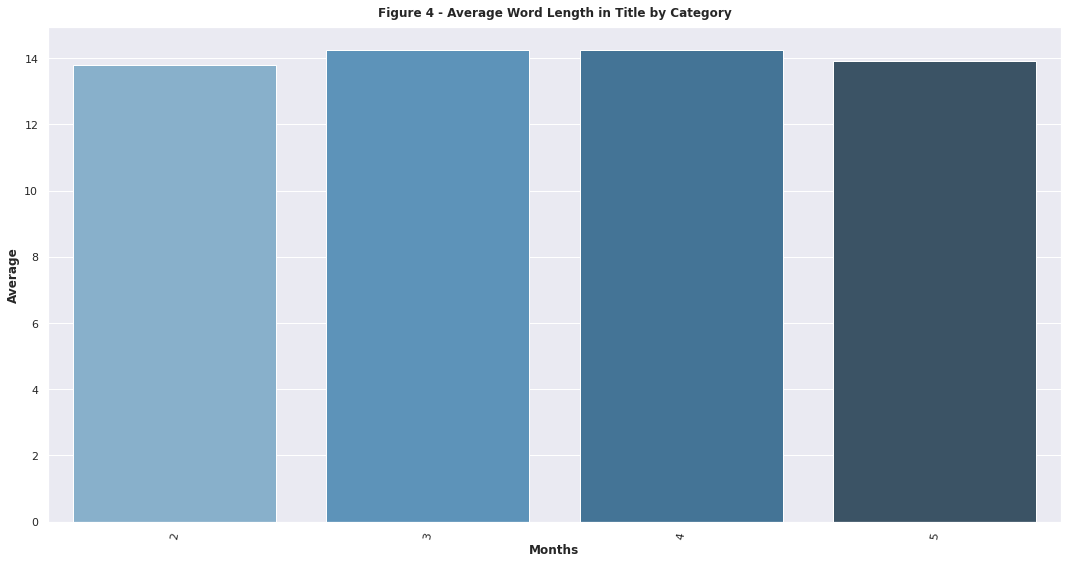

In [ ]:
categories = df_ed2["month"].unique()
aux = []
j = 0
for i in categories:
    df_aux = df_ed2[df_ed2["month"] == i]
    aux.append(np.mean(df_aux['title'].apply(lambda x : len(x.split()))))
    j = j+1

df_aux = pd.DataFrame({
    "Months" : categories,
    "Average": aux
}
)

df_aux = df_aux.sort_values(['Average'], ascending=False).reset_index(drop=True)

sns.set(rc={'figure.figsize':(15,8)})

ax = sns.barplot(x="Months", y="Average", data=df_aux, palette="Blues_d")
plt.title("Figure 4 - Average Word Length in Title by Category",
          fontweight="bold", size=12)
plt.xticks(rotation=80);

#### **Word Cloud**


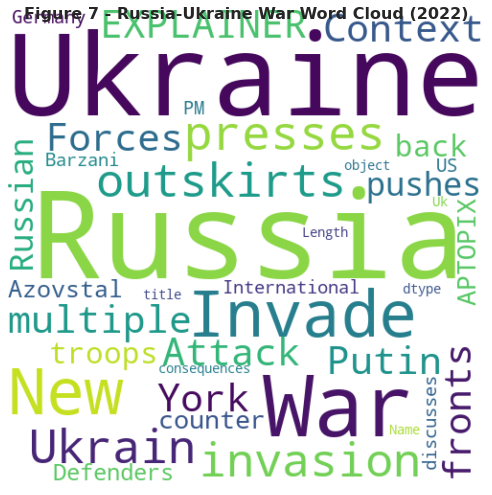

In [91]:
stopwords1 = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)

wordcloud.generate(str(df2['title']))
plt.rcParams['figure.figsize'] = (8,7)
plt.axis('off')
plt.suptitle('Figure 7 - Russia-Ukraine War Word Cloud (2022)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# **Sentiment Analysis**


## **Text Preprocessing for Sentiment Analysis**

In [101]:
#defining constants to represent the class labels :positive, negative, and abstain
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1
#define function which looks into the input words to represent a proper label
def keyword_lookup(x, keywords, label):  
    if any(word in x.text.lower() for word in keywords):
        return label
    return ABSTAIN
#define function which assigns a correct label
def make_keyword_lf(keywords, label=POSITIVE):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label))

#these two lists can be further extended 
"""positive news might contain the following words' """
keyword_positive = make_keyword_lf(keywords=['boosts', 'great', 'develops', 'promising', 'ambitious', 'delighted', 'record', 'win', 'breakthrough', 'recover', 'achievement', 
                                             'peace', 'party', 'hope', 'flourish', 'respect', 'partnership', 'champion', 'positive', 'happy', 'bright', 'confident', 'encouraged', 
                                             'perfect', 'complete', 'assured' ])
"""negative news might contain the following words"""
keyword_negative = make_keyword_lf(keywords=['war','solidiers', 'turmoil', 'injur','trouble', 'aggressive', 'killed', 'coup', 'evasion', 'strike', 'troops', 'dismisses', 'attacks',
                                             'defeat', 'damage', 'dishonest', 'dead', 'fear', 'foul', 'fails', 'hostile', 'cuts', 'accusations', 'victims',  'death', 'unrest', 
                                             'fraud', 'dispute', 'destruction', 'battle', 'unhappy', 'bad', 'alarming', 'angry', 'anxious', 'dirty', 'pain', 'poison', 'unfair', 
                                             'unhealthy', 'tensions','emergency', 'Accident', 'Fears', 'invades', 'invasion', 'ditch', 'conflict ', 'vulnerable ', 'slap', 
                                             'weaponizing', 'crisis', 'warships', 'pessimistic','crash', 'risks', 'bombers', 'threat', 'embarrassment', 'dispute', 'Covid', 
                                             'complicate', 'separatists'], label=NEGATIVE)

**Another set of labeling functions was created using the TextBlob tool, which is a sentiment analyzer that has been pre-trained. We'll make a Pre-processor that runs TextBlob on our headlines before extracting the polarity and subjectivity ratings.**


In [102]:
#set up a preprocessor function to determine polarity & subjectivity using textlob pretrained classifier 
@preprocessor(memoize=True)
def textblob_sentiment(x):
    scores = TextBlob(x.text)
    x.polarity = scores.sentiment.polarity
    x.subjectivity = scores.sentiment.subjectivity
    return x
#find polarity
@labeling_function(pre=[textblob_sentiment])
def textblob_polarity(x):
    return POSITIVE if x.polarity > 0.6 else ABSTAIN
#find subjectivity 
@labeling_function(pre=[textblob_sentiment])
def textblob_subjectivity(x):
    return POSITIVE if x.subjectivity >= 0.5 else ABSTAIN

**After that, we'll integrate all of the labeling functions and apply them to our dataset. The label model was then used to predict and generate positive and negative classes.**


## **Before war -  label_model to predict and generate the positive and negative classes**


In [103]:
#conduct some data cleaning
dfl1 = df1.drop(['link', 'date'], axis=1)
dfl1 = dfl1.rename(columns = {'title': 'text'})
dfl1['text'] = dfl1['text'].astype(str)
dfl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1164 non-null   object
dtypes: object(1)
memory usage: 9.2+ KB


In [104]:
#combine all the labeling functions 
lfs = [keyword_positive, keyword_negative, textblob_polarity, textblob_subjectivity ]
#apply the lfs on the dataframe
applier = PandasLFApplier(lfs=lfs)
L_snorkel = applier.apply(df=dfl1)
#apply the label model
label_model = LabelModel(cardinality=2, verbose=True)
#fit on the data
label_model.fit(L_snorkel)
#predict and create the labels
dfl1["label"] = label_model.predict(L=L_snorkel)

100%|██████████| 1164/1164 [00:02<00:00, 489.51it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/100 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=0.187]
INFO:root:[10 epochs]: TRAIN:[loss=0.069]
INFO:root:[20 epochs]: TRAIN:[loss=0.002]
INFO:root:[30 epochs]: TRAIN:[loss=0.006]
INFO:root:[40 epochs]: TRAIN:[loss=0.002]
INFO:root:[50 epochs]: TRAIN:[loss=0.001]
INFO:root:[60 epochs]: TRAIN:[loss=0.000]
 67%|██████▋   | 67/100 [00:00<00:00, 664.81epoch/s]INFO:root:[70 epochs]: TRAIN:[loss=0.000]
INFO:root:[80 epochs]: TRAIN:[loss=0.000]
INFO:root:[90 epochs]: TRAIN:[loss=0.000]
100%|██████████| 100/100 [00:00<00:00, 661.44epoch/s]
INFO:root:Finished Training


In [105]:
#Filtering out unlabeled data points
dfl1= dfl1.loc[dfl1.label.isin([0,1,-1]), :]
#find the label counts 
dfl1['label'].value_counts()

 0    675
-1    389
 1    100
Name: label, dtype: int64

[Text(0, 0, 'Neutral'), Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

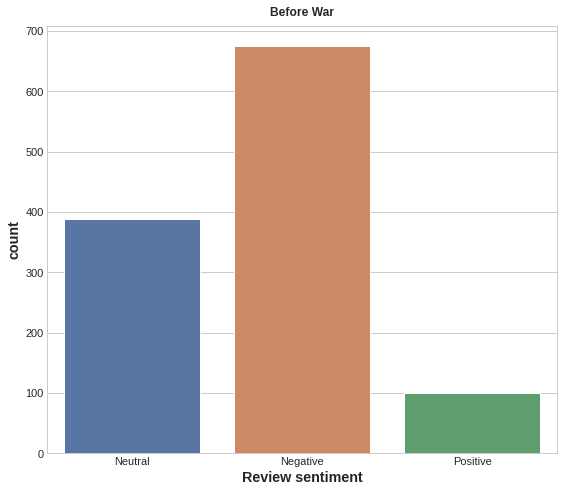

In [106]:
#Visualization
# Let's have a look at the class balance.
class_names = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(dfl1.label)
plt.title('Before War')
plt.xlabel('Review sentiment')
ax.set_xticklabels(class_names)

**The graph clearly shows that before war the news was negative and neutral  and hardly any positive.**


## **During War -  label_model to predict and generate the positive and negative classes**


In [108]:
#conduct some data cleaning
dfl2 = df2.drop(['link', 'date'], axis=1)
dfl2 = dfl2.rename(columns = {'title': 'text'})
dfl2['text'] = dfl2['text'].astype(str)
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5963 entries, 0 to 5962
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5963 non-null   object
dtypes: object(1)
memory usage: 46.7+ KB


In [109]:
#combine all the labeling functions 
lfs = [keyword_positive, keyword_negative, textblob_polarity, textblob_subjectivity ]
#apply the lfs on the dataframe
applier = PandasLFApplier(lfs=lfs)
L_snorkel = applier.apply(df=dfl2)
#apply the label model
label_model = LabelModel(cardinality=2, verbose=True)
#fit on the data
label_model.fit(L_snorkel)
#predict and create the labels
dfl2["label"] = label_model.predict(L=L_snorkel)

100%|██████████| 5963/5963 [00:10<00:00, 556.30it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/100 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=0.198]
INFO:root:[10 epochs]: TRAIN:[loss=0.072]
INFO:root:[20 epochs]: TRAIN:[loss=0.002]
INFO:root:[30 epochs]: TRAIN:[loss=0.006]
INFO:root:[40 epochs]: TRAIN:[loss=0.003]
INFO:root:[50 epochs]: TRAIN:[loss=0.001]
INFO:root:[60 epochs]: TRAIN:[loss=0.000]
 61%|██████    | 61/100 [00:00<00:00, 595.54epoch/s]INFO:root:[70 epochs]: TRAIN:[loss=0.000]
INFO:root:[80 epochs]: TRAIN:[loss=0.000]
INFO:root:[90 epochs]: TRAIN:[loss=0.000]
100%|██████████| 100/100 [00:00<00:00, 589.97epoch/s]
INFO:root:Finished Training


In [110]:
#Filtering out unlabeled data points
dfl2= dfl2.loc[dfl2.label.isin([0,1,-1]), :]
#find the label counts 
dfl2['label'].value_counts()

 0    3669
-1    1696
 1     598
Name: label, dtype: int64

[Text(0, 0, 'Neutral'), Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

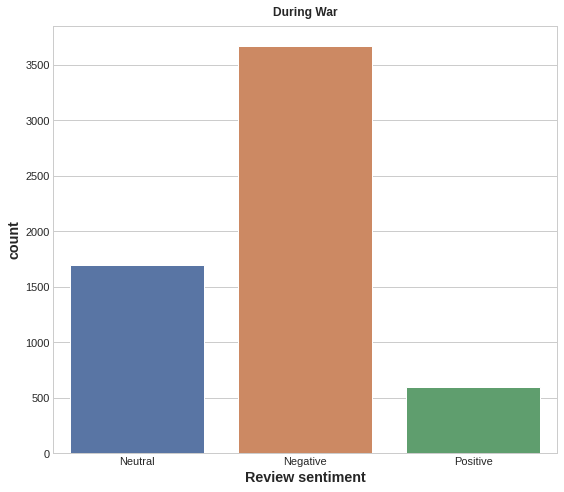

In [111]:
#Visualization
# Let's have a look at the class balance.
class_names = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(dfl2.label)
plt.title('During War')
plt.xlabel('Review sentiment')
ax.set_xticklabels(class_names)

**We can see that the number of negative words in the dataset during the war is significantly higher than the number of positive or neutral words.**

# **UK, US, Canada, India- label_model to predict and generate the positive and negative classes**

In [113]:
#conduct some data cleaning
dfl3 = df3.drop(['link', 'date'], axis=1)
dfl3 = dfl3.rename(columns = {'title': 'text'})
dfl3['text'] = dfl3['text'].astype(str)
dfl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12598 entries, 0 to 12597
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12598 non-null  object
dtypes: object(1)
memory usage: 98.5+ KB


In [114]:
# combine all the labeling functions 
lfs = [keyword_positive, keyword_negative, textblob_polarity, textblob_subjectivity ]
#apply the lfs on the dataframe
applier = PandasLFApplier(lfs=lfs)
L_snorkel = applier.apply(df=dfl3)
#apply the label model
label_model = LabelModel(cardinality=2, verbose=True)
#fit on the data
label_model.fit(L_snorkel)
#predict and create the labels
dfl3["label"] = label_model.predict(L=L_snorkel)

100%|██████████| 12598/12598 [00:18<00:00, 682.63it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/100 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=0.079]
INFO:root:[10 epochs]: TRAIN:[loss=0.030]
INFO:root:[20 epochs]: TRAIN:[loss=0.001]
INFO:root:[30 epochs]: TRAIN:[loss=0.002]
INFO:root:[40 epochs]: TRAIN:[loss=0.001]
INFO:root:[50 epochs]: TRAIN:[loss=0.000]
INFO:root:[60 epochs]: TRAIN:[loss=0.000]
INFO:root:[70 epochs]: TRAIN:[loss=0.000]
 75%|███████▌  | 75/100 [00:00<00:00, 735.13epoch/s]INFO:root:[80 epochs]: TRAIN:[loss=0.000]
INFO:root:[90 epochs]: TRAIN:[loss=0.000]
100%|██████████| 100/100 [00:00<00:00, 739.21epoch/s]
INFO:root:Finished Training


In [115]:
#Filtering out unlabeled data points
dfl3= dfl3.loc[dfl3.label.isin([0,1,-1]), :]
#find the label counts 
dfl3['label'].value_counts()

-1    6280
 0    4582
 1    1736
Name: label, dtype: int64

[Text(0, 0, 'Neutral'), Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

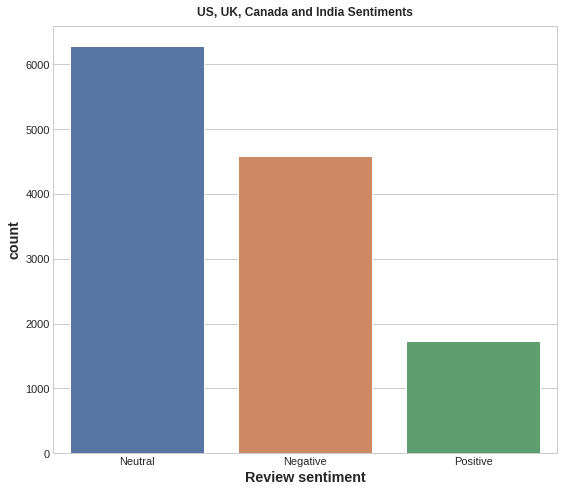

In [116]:
# Let's have a look at the class balance.
class_names = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(dfl3.label)
plt.xlabel('Review sentiment')
plt.title('US, UK, Canada and India Sentiments')
ax.set_xticklabels(class_names)

**Through the graph we can see that the countries like US, UK, India and Canada are neutral about the war**

## **Text Preprocessing**


#### **Before War- Dataframe**


In [107]:
#make a copy of the dataframe
data1 = dfl1.copy()
#define a function which handles the text preprocessing 
def preparation_text_data(data1):
    """
    This pipeline prepares the text data, conducting the following steps:
    1) Tokenization
    2) Lemmatization
    4) Removal of stopwords
    5) Removal of punctuation
    """
    # initialize spacy object
    nlp = spacy.load('en_core_web_sm')
    # select raw text
    raw_text = data1.text.values.tolist()
    # tokenize
    tokenized_text = [[nlp(i.lower().strip())] for i in tqdm(raw_text)]
    #define the punctuations and stop words
    punc = string.punctuation 
    stop_words = set(stopwords.words('english'))
    #lemmatize, remove stopwords and punctuationd
    corpus = []
    for doc in tqdm(tokenized_text):
        corpus.append([word.lemma_ for word in doc[0] if (word.lemma_ not in stop_words and word.lemma_ not in punc)])
    # add prepared data to df
    data1["text"] = corpus
    return data1
#apply the data preprocessing function
data1 =  preparation_text_data(data1)

  0%|          | 0/1164 [00:00<?, ?it/s]

  0%|          | 0/1164 [00:00<?, ?it/s]

#### **During WAR - Dataframe**

In [112]:
#make a copy of the dataframe
data2 = dfl2.copy()
#define a function which handles the text preprocessing 
def preparation_text_data(data2):
    """
    This pipeline prepares the text data, conducting the following steps:
    1) Tokenization
    2) Lemmatization
    4) Removal of stopwords
    5) Removal of punctuation
    """
    # initialize spacy object
    nlp = spacy.load('en_core_web_sm')
    # select raw text
    raw_text = data2.text.values.tolist()
    # tokenize
    tokenized_text = [[nlp(i.lower().strip())] for i in tqdm(raw_text)]
    #define the punctuations and stop words
    punc = string.punctuation 
    stop_words = set(stopwords.words('english'))
    #lemmatize, remove stopwords and punctuationd
    corpus = []
    for doc in tqdm(tokenized_text):
        corpus.append([word.lemma_ for word in doc[0] if (word.lemma_ not in stop_words and word.lemma_ not in punc)])
    # add prepared data to df
    data2["text"] = corpus
    return data2
#apply the data preprocessing function
data2 =  preparation_text_data(data2)

  0%|          | 0/5963 [00:00<?, ?it/s]

  0%|          | 0/5963 [00:00<?, ?it/s]

####**US, UK, Canada and India - Dataframe**



In [117]:
#make a copy of the dataframe
data3 = dfl3.copy()
#define a function which handles the text preprocessing 
def preparation_text_data(data3):
    """
    This pipeline prepares the text data, conducting the following steps:
    1) Tokenization
    2) Lemmatization
    4) Removal of stopwords
    5) Removal of punctuation
    """
    # initialize spacy object
    nlp = spacy.load('en_core_web_sm')
    # select raw text
    raw_text = data3.text.values.tolist()
    # tokenize
    tokenized_text = [[nlp(i.lower().strip())] for i in tqdm(raw_text)]
    #define the punctuations and stop words
    punc = string.punctuation 
    stop_words = set(stopwords.words('english'))
    #lemmatize, remove stopwords and punctuationd
    corpus = []
    for doc in tqdm(tokenized_text):
        corpus.append([word.lemma_ for word in doc[0] if (word.lemma_ not in stop_words and word.lemma_ not in punc)])
    # add prepared data to df
    data3["text"] = corpus
    return data3
#apply the data preprocessing function
data3 =  preparation_text_data(data3)

  0%|          | 0/12598 [00:00<?, ?it/s]

  0%|          | 0/12598 [00:00<?, ?it/s]

## **Text Representation**

In [118]:
def text_representation(data1):
  tfidf_vect = TfidfVectorizer()
  data1['text'] = data1['text'].apply(lambda text: " ".join(set(text)))
  X_tfidf = tfidf_vect.fit_transform(data1['text'])
  print(X_tfidf.shape)
  print(tfidf_vect.get_feature_names())
  X_tfidf = pd.DataFrame(X_tfidf.toarray())
  return X_tfidf
#apply the TFIDV function
X_tfidf = text_representation(data1)

(1164, 2538)
['000', '10', '100', '10000', '11', '11th', '12', '120', '13', '130000', '14', '15', '150', '16', '17', '19', '1922', '1945', '1980', '2014', '2021', '2022', '2023', '203', '22', '229', '236', '24', '25', '259', '2nd', '30', '41', '48', '486', '50', '503', '50th', '56', '58', '59', '592', '60', '622', '650', '67', '70', '75', '750', '79', '7mn', '80', '83', '84', '8500', '906', '94', '953', '9news', 'abandon', 'abc', 'abc27', 'able', 'abramovich', 'absolutely', 'accept', 'access', 'accord', 'accusation', 'accuse', 'across', 'act', 'action', 'activity', 'actually', 'add', 'additional', 'address', 'adele', 'adjustment', 'admin', 'administration', 'admit', 'adrian', 'adult', 'advance', 'advert', 'advice', 'advise', 'adviser', 'affairs', 'affect', 'afghanistan', 'africa', 'ag', 'age', 'agency', 'agenda', 'aggression', 'aggressive', 'ago', 'agree', 'agreement', 'agriculture', 'agweb', 'ahead', 'ahval', 'aid', 'aim', 'air', 'airbnb', 'aircraft', 'airplane', 'airport', 'airspace'

In [119]:
X_tfidf2 = text_representation(data2)

(5963, 6545)
['000', '037', '04', '06', '07', '10', '100', '100000', '100th', '101', '104', '108', '10mn', '11', '110', '112', '115', '11alive', '12', '120', '122', '127', '128', '12k', '12news', '13', '130', '132', '133', '134', '136', '14', '140', '146', '15', '150', '1500', '15000', '154', '158', '15k', '16', '162', '167', '169', '17', '170', '18', '180bn', '19', '1918', '1940', '1984', '1994', '19fortyfive', '1b', '1bn', '1news', '1st', '20', '200', '20000', '2001', '2008', '2020', '2022', '2023', '2024', '2028', '208', '20th', '21', '21st', '22', '220', '225', '228', '23', '24', '242', '246', '24k', '25', '250', '258', '26', '27', '28', '29', '2900', '2nd', '30', '300', '306', '31', '310', '32', '33', '34', '35', '350', '356', '35bn', '36', '36th', '37', '38', '389', '38th', '39', '3bn', '3rd', '40', '400', '40th', '41', '42', '423', '428', '43', '430', '431000', '44', '445', '45', '457', '46', '47', '48', '49', '498', '4b', '4bn', '50', '500', '5000', '500mn', '50k', '50mn', '50t

In [120]:
X_tfidf3 = text_representation(data3)

(12598, 11130)
['00', '000', '02', '03', '04', '05', '06', '07', '08', '10', '100', '1000', '100000', '101', '1031', '105', '106', '10k', '10million', '10th', '11', '110', '114', '12', '120', '120000', '13', '130', '131', '134', '135', '136', '13newsnow', '13th', '14', '1401', '14068', '15', '150', '151', '15b', '16', '16s', '17', '170', '175', '17bn', '18', '18000', '19', '1930s', '1934', '1936', '1937', '1939', '1940', '1941', '1945', '196', '1962', '1979', '198', '1990s', '1991', '1992', '1994', '1999', '19fortyfive', '1b', '1bn', '1news', '1q', '1q2022', '1q22', '1st', '20', '200', '2008', '200bn', '200k', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2027', '2028', '2030', '2032', '2042', '206', '208', '20th', '21', '2100', '21st', '22', '228', '229', '22bn', '23', '232', '238', '23rd', '24', '240', '24th', '25', '250', '25000', '257', '25th', '25yo', '26', '27', '28', '287', '28n', '29', '2nd', '2q22', '2step', '3

## **Model Training through Pipeline**
Here we will be using 6 different models in the pipeline to test the accuracy of each dataset.

In [121]:
#Creating a list of Pipeline with well-known ML models
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

pipelines=[]
for model in [DecisionTreeClassifier(), AdaBoostClassifier(), ComplementNB(), 
              LogisticRegression(solver='saga'), RidgeClassifier(solver='auto'), SVC(),RandomForestClassifier()]:
    pipeline=make_pipeline(TfidfVectorizer(lowercase=True), model)
    pipelines.append(pipeline)

In [122]:
X= data1.text
y=data1.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [123]:
#Training the model
import time
training_time=[]

for pipeline in pipelines:
    start=time.time()
    pipeline.fit(X_train, y_train)
    stop=time.time()
    training_time.append(stop-start)

In [124]:
#Prediction from test dataset
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
model_name=[]
precision_array=[]
recall_array=[]
f1_array=[]
test_time=[]
print("Classifiation Report\n")
print("*****************************************************")
for i, pipeline in enumerate(pipelines):
    start=time.time()
    y_pred=pipeline.predict(X_test)
    stop=time.time()
    test_time.append(stop-start)
    print(pipelines[i].steps[1][0].upper())
    model_name.append(pipelines[i].steps[1][0].upper())
    f1_array.append(round(f1_score(y_test, y_pred, average='weighted'),2))
    precision_array.append(round(precision_score(y_test, y_pred, average='weighted'),2))
    recall_array.append(round(recall_score(y_test, y_pred, average='weighted'),2))
    print("\n",classification_report(y_test, y_pred))
    print("*****************************************************")
    print("*****************************************************")

Classifiation Report

*****************************************************
DECISIONTREECLASSIFIER

               precision    recall  f1-score   support

          -1       0.78      0.90      0.84        71
           0       0.96      0.89      0.92       149
           1       0.08      0.08      0.08        13

    accuracy                           0.85       233
   macro avg       0.61      0.62      0.61       233
weighted avg       0.85      0.85      0.85       233

*****************************************************
*****************************************************
ADABOOSTCLASSIFIER

               precision    recall  f1-score   support

          -1       0.70      0.89      0.78        71
           0       0.96      0.89      0.92       149
           1       0.25      0.08      0.12        13

    accuracy                           0.85       233
   macro avg       0.64      0.62      0.61       233
weighted avg       0.84      0.85      0.84       233

********

Through the pipeline of different models we got to know that the DecisionTreeClassifier model is the best as its accuracy is highest 85%

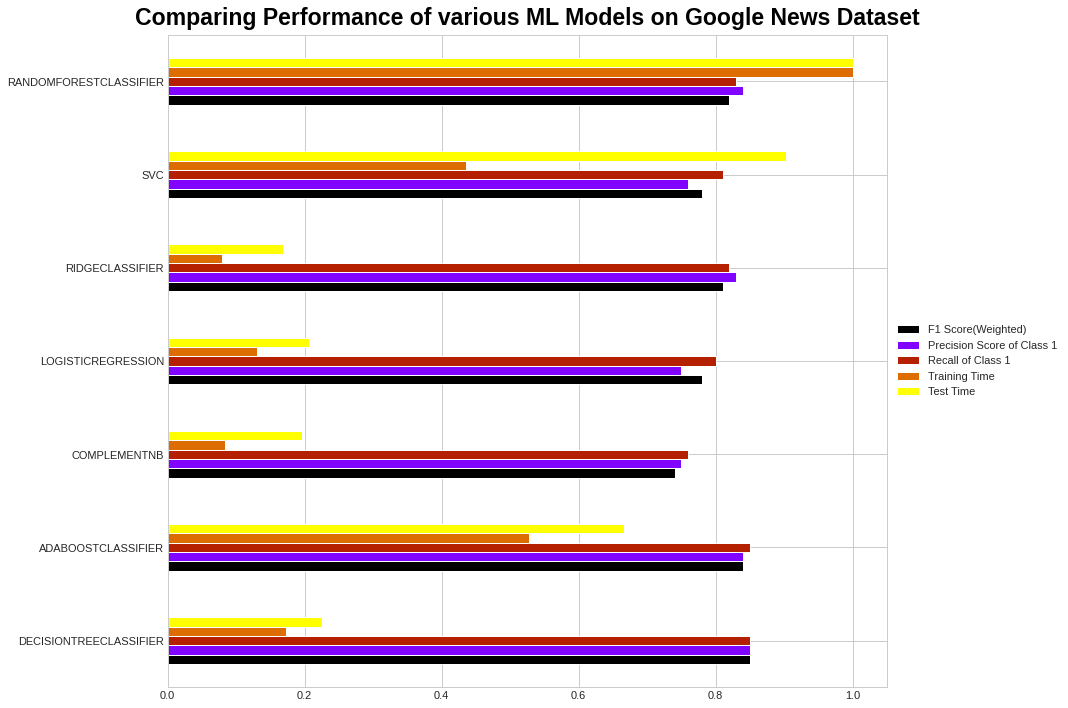

In [125]:
#Plotting the various performance metrix of all models
training_time=np.array(training_time)/np.max(training_time)
test_time=np.array(test_time)/np.max(test_time)
score_df=pd.DataFrame({'F1 Score(Weighted)':f1_array,
                     'Precision Score of Class 1':precision_array,
                     'Recall of Class 1':recall_array,
                      'Training Time': training_time,
                      'Test Time':test_time}, index=model_name)

f=plt.figure(figsize=(15,10))
plt.title('Comparing Performance of various ML Models on Google News Dataset', color='Black',
         fontdict={'fontsize':23})
score_df.plot(kind='barh', ax=f.gca(), cmap='gnuplot')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## **Dataset2: During the War**


In [126]:
X= data2.text
y=data2.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [127]:
#Training the model
import time
training_time=[]

for pipeline in pipelines:
    start=time.time()
    pipeline.fit(X_train, y_train)
    stop=time.time()
    training_time.append(stop-start)

In [128]:
#Prediction from test dataset
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
model_name=[]
precision_array=[]
recall_array=[]
f1_array=[]
test_time=[]
print("Classifiation Report\n")
print("*****************************************************")
for i, pipeline in enumerate(pipelines):
    start=time.time()
    y_pred=pipeline.predict(X_test)
    stop=time.time()
    test_time.append(stop-start)
    print(pipelines[i].steps[1][0].upper())
    model_name.append(pipelines[i].steps[1][0].upper())
    f1_array.append(round(f1_score(y_test, y_pred, average='weighted'),2))
    precision_array.append(round(precision_score(y_test, y_pred, average='weighted'),2))
    recall_array.append(round(recall_score(y_test, y_pred, average='weighted'),2))
    print("\n",classification_report(y_test, y_pred))
    print("*****************************************************")
    print("*****************************************************")

Classifiation Report

*****************************************************
DECISIONTREECLASSIFIER

               precision    recall  f1-score   support

          -1       0.81      0.86      0.84       339
           0       0.96      0.94      0.95       725
           1       0.57      0.53      0.55       129

    accuracy                           0.87      1193
   macro avg       0.78      0.78      0.78      1193
weighted avg       0.87      0.87      0.87      1193

*****************************************************
*****************************************************
ADABOOSTCLASSIFIER

               precision    recall  f1-score   support

          -1       0.75      0.94      0.84       339
           0       0.96      0.86      0.91       725
           1       0.38      0.36      0.37       129

    accuracy                           0.83      1193
   macro avg       0.70      0.72      0.71      1193
weighted avg       0.84      0.83      0.83      1193

********

Through the pipeline of 7 models we got to know that the DecisionTreeClassifier model is the best as its accuracy is highest 87%

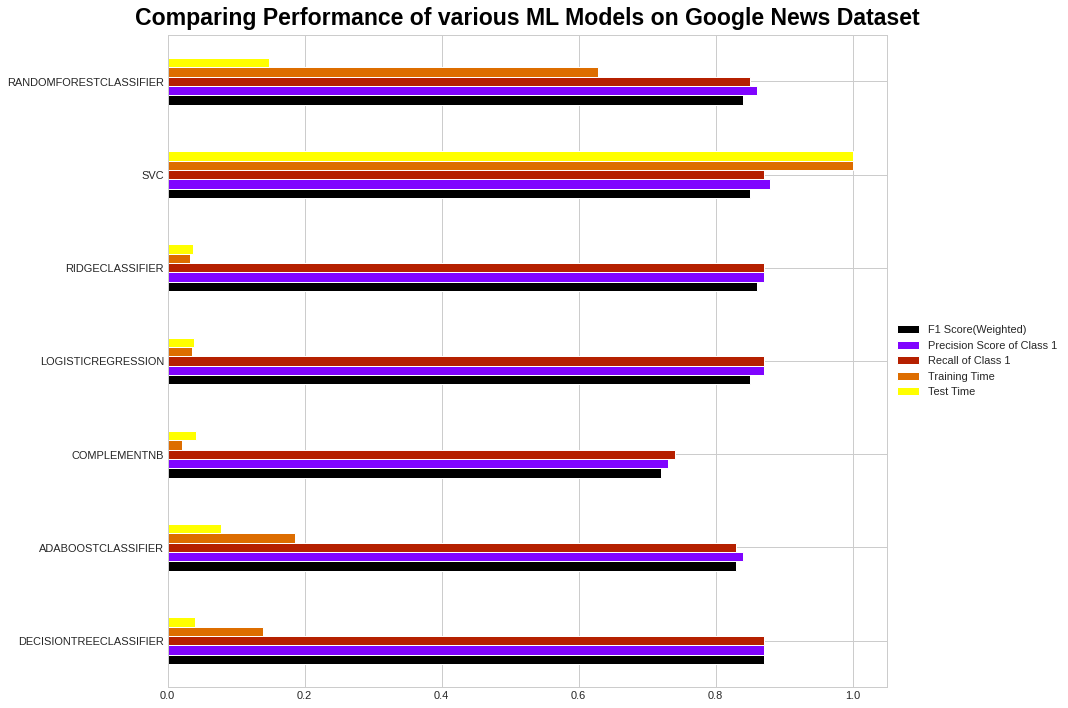

In [129]:
#Plotting the various performance metrix of all models
training_time=np.array(training_time)/np.max(training_time)
test_time=np.array(test_time)/np.max(test_time)
score_df=pd.DataFrame({'F1 Score(Weighted)':f1_array,
                     'Precision Score of Class 1':precision_array,
                     'Recall of Class 1':recall_array,
                      'Training Time': training_time,
                      'Test Time':test_time}, index=model_name)

f=plt.figure(figsize=(15,10))
plt.title('Comparing Performance of various ML Models on Google News Dataset', color='Black',
         fontdict={'fontsize':23})
score_df.plot(kind='barh', ax=f.gca(), cmap='gnuplot')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## **Model Training od Dataset 3: Combined 4 countries df**

In [134]:
X= data3.text
y=data3.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [135]:
#Training the model
import time
training_time=[]

for pipeline in pipelines:
    start=time.time()
    pipeline.fit(X_train, y_train)
    stop=time.time()
    training_time.append(stop-start)

In [136]:
#Prediction from test dataset
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
model_name=[]
precision_array=[]
recall_array=[]
f1_array=[]
test_time=[]
print("Classifiation Report\n")
print("*****************************************************")
for i, pipeline in enumerate(pipelines):
    start=time.time()
    y_pred=pipeline.predict(X_test)
    stop=time.time()
    test_time.append(stop-start)
    print(pipelines[i].steps[1][0].upper())
    model_name.append(pipelines[i].steps[1][0].upper())
    f1_array.append(round(f1_score(y_test, y_pred, average='weighted'),2))
    precision_array.append(round(precision_score(y_test, y_pred, average='weighted'),2))
    recall_array.append(round(recall_score(y_test, y_pred, average='weighted'),2))
    print("\n",classification_report(y_test, y_pred))
    print("*****************************************************")
    print("*****************************************************")

Classifiation Report

*****************************************************
DECISIONTREECLASSIFIER

               precision    recall  f1-score   support

          -1       0.89      0.92      0.90      1266
           0       0.96      0.95      0.95       908
           1       0.66      0.60      0.63       346

    accuracy                           0.88      2520
   macro avg       0.83      0.82      0.83      2520
weighted avg       0.88      0.88      0.88      2520

*****************************************************
*****************************************************
ADABOOSTCLASSIFIER

               precision    recall  f1-score   support

          -1       0.80      0.97      0.88      1266
           0       0.97      0.89      0.93       908
           1       0.64      0.26      0.37       346

    accuracy                           0.85      2520
   macro avg       0.80      0.71      0.72      2520
weighted avg       0.84      0.85      0.83      2520

********

Through the pipeline of different models we got to know that the DecisionTreeClassifier and RandomForest model are the best as their accuracy is highest 89%

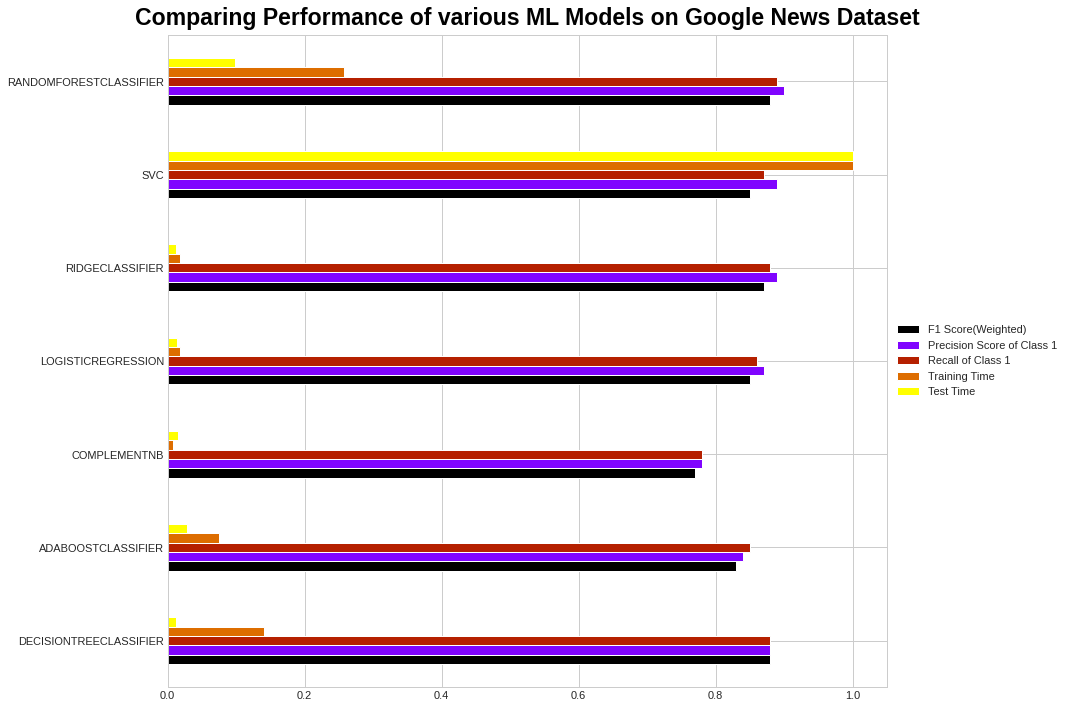

In [137]:
#Plotting the various performance metrix of all models
training_time=np.array(training_time)/np.max(training_time)
test_time=np.array(test_time)/np.max(test_time)
score_df=pd.DataFrame({'F1 Score(Weighted)':f1_array,
                     'Precision Score of Class 1':precision_array,
                     'Recall of Class 1':recall_array,
                      'Training Time': training_time,
                      'Test Time':test_time}, index=model_name)

f=plt.figure(figsize=(15,10))
plt.title('Comparing Performance of various ML Models on Google News Dataset', color='Black',
         fontdict={'fontsize':23})
score_df.plot(kind='barh', ax=f.gca(), cmap='gnuplot')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Through the graph we can conclude that the Decision Tree Classifier is more accurate because when compared to Random Forest the time taken by training time and testing time is lesser and precision and recall is also better.

## **Deep learning Approach: Tensor Flow and Keras**


###**Train Test Split**

In [147]:
##store headlines and labels in respective lists
text = list(data2['text'])
labels = list(data2['label'])
##sentences
training_text = text[0:100]
testing_text = text[100:]
##labels
training_labels = labels[0:100]
testing_labels = labels[100:]

### **Set up the tokenizer from Tensor to pre-process the data.**

In [148]:
#preprocess 
tokenizer = Tokenizer(num_words=10000, oov_token= "<OOV>")
tokenizer.fit_on_texts(training_text)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequences, maxlen=120, padding='post', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testing_text)
testing_padded = pad_sequences(testing_sequences, maxlen=120, padding='post', truncating='post')
# convert lists into numpy arrays to make it work with TensorFlow 
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### **Define & train the Sequential model**

In [149]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [150]:
num_epochs = 10
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/10
4/4 - 1s - loss: 0.6946 - accuracy: 0.2000 - val_loss: 0.6865 - val_accuracy: 0.6162 - 1s/epoch - 268ms/step
Epoch 2/10
4/4 - 0s - loss: 0.6813 - accuracy: 0.5600 - val_loss: 0.6739 - val_accuracy: 0.6162 - 263ms/epoch - 66ms/step
Epoch 3/10
4/4 - 0s - loss: 0.6675 - accuracy: 0.5600 - val_loss: 0.6627 - val_accuracy: 0.6162 - 335ms/epoch - 84ms/step
Epoch 4/10
4/4 - 0s - loss: 0.6547 - accuracy: 0.5600 - val_loss: 0.6511 - val_accuracy: 0.6162 - 338ms/epoch - 85ms/step
Epoch 5/10
4/4 - 0s - loss: 0.6408 - accuracy: 0.5600 - val_loss: 0.6388 - val_accuracy: 0.6162 - 337ms/epoch - 84ms/step
Epoch 6/10
4/4 - 0s - loss: 0.6260 - accuracy: 0.5600 - val_loss: 0.6248 - val_accuracy: 0.6162 - 256ms/epoch - 64ms/step
Epoch 7/10
4/4 - 0s - loss: 0.6097 - accuracy: 0.5600 - val_loss: 0.6094 - val_accuracy: 0.6162 - 333ms/epoch - 83ms/step
Epoch 8/10
4/4 - 0s - loss: 0.5918 - accuracy: 0.5600 - val_loss: 0.5934 - val_accuracy: 0.6162 - 255ms/epoch - 64ms/step
Epoch 9/10
4/4 - 0s - loss

## **Model Training through Transformer- BERT (On a section of our Data)**


### **Text Preprocessing for BERT**


In [152]:
aux = pd.DataFrame(
    {
        "Setting": ["Model Name", "Number of Epochs", "Batch Size",
                   "Max Sequence Length", "Learning Rate", "Accumulation Steps",
                   "Random Seed"],
        "Value": ["bert-base-uncased", 4, 32, 36, 5e-5, 4, 42]
    }
)

display(HTML('<span style="font-weight:bold">' + 'Table 4 - BERT Model Setup'\
             + '</span>'),aux) 

,Setting,Value
0,Model Name,bert-base-uncased
1,Number of Epochs,4
2,Batch Size,32
3,Max Sequence Length,36
4,Learning Rate,0.00005
5,Accumulation Steps,4
6,Random Seed,42


In [153]:
#make a copy of the dataframe
df_1 = dfl1.copy()
#define a function which handles the text preprocessing 
def clean_text(df_1):
    """
    Text preprocessing:
    tokenize, make lower case,
    Remove Stop word, punctuation, digit
    lemmatize
    """
    nlp = spacy.load('en')
    for i in range(df_1.shape[0]):
        doc = nlp(df_1['text'][i])
        # Word Tokenize
        #token = [w.text for w in doc]
        
        # Make Lower case
        # Remove Stop word, punctuation, digit and lemmatize
        text = [w.lemma_.lower().strip() for w in doc 
               if not (w.is_stop |
                    w.is_punct |
                    w.is_digit)
               ]
        text = " ".join(text)
        
        
        df_1['text'][i] = text
    return df_1

In [154]:
df_1 = clean_text(df_1)

In [155]:
text_len = []
for text in df_1.text:
    title_len = len(text.split())
    text_len.append(title_len)

In [156]:
df_1['text_len'] = text_len

**Text with less than 20 words**

Text(0.5, 1.0, 'HeadLines with less than 20 words')

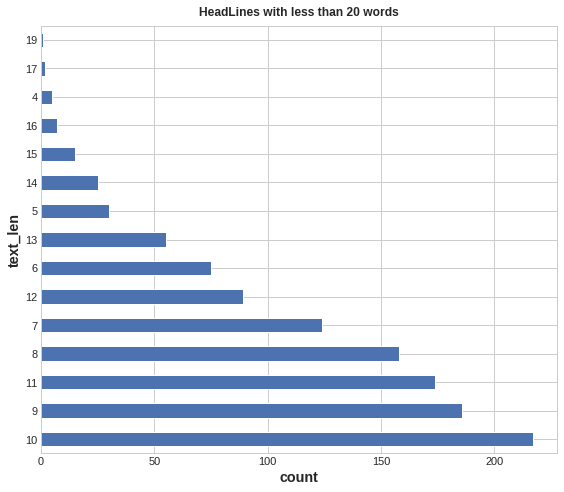

In [297]:
plt.figure(figsize=(8,7))
data=df_1[df_1['text_len']<20]
data['text_len'].value_counts().plot(kind='barh', figsize=(8,7))
plt.xlabel("count")
plt.ylabel("text_len")
plt.title("HeadLines with less than 20 words")

In [289]:
print(f" DF SHAPE: {df_1.shape}")

 DF SHAPE: (1164, 3)


## **Data Processing for BERT**

Raw text is incompatible with machine learning models. We'll need to convert text to numerical form. When it comes to its representation, BERT requires even more attention.

Here are the requirements:

1.  Add special tokens to separate sentences and do classification
2.  Pass sequences of constant length (introduce padding)
3. Create array of 0s (pad token) and 1s (real token) called attention mask.

BERT has a number of model architectures, and I'll be combining one of them with manual preprocessing. I'm using the cased version.

The tokenizer will break the sentence into words and give numerical values to each word.

In [158]:
# Set the model name
MODEL_NAME = 'bert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [159]:
#Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


BERT works with fixed-length sequences. To determine the maximum length, we'll utilize a simple technique. Let's keep track of each review's token length.

In [247]:
# Store length of each review 
token_lens = []

# Iterate through the text slide
for txt in data1.text:
    tokens = tokenizer.encode(txt, max_length=36, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [248]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 36


Text(0.5, 0, 'Token count')

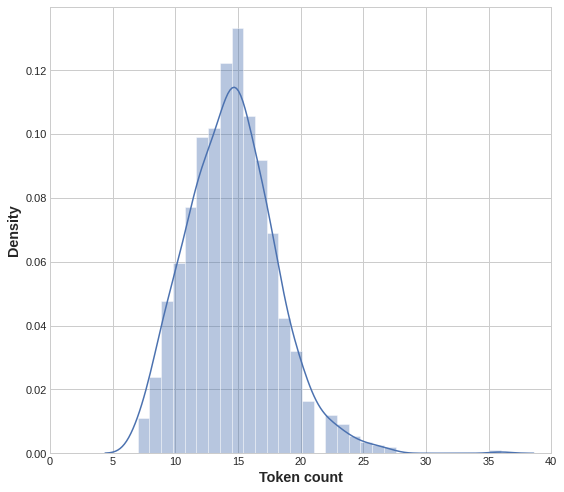

In [291]:
# plot the distribution of title lengths 
sns.distplot(token_lens)
plt.xlim([0, 40]);
plt.xlabel('Token count')

Most of the reviews seem to contain less than 40 tokens, but we’ll be on the safe side and choose a maximum length of 20.

Label counts in each df:


In [250]:
df_1['label'].value_counts()

 0    675
-1    389
 1    100
Name: label, dtype: int64

## **Class Balancing by RandomOverSampler**


In [163]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_1['text']).reshape(-1, 1), np.array(df_1['label']).reshape(-1, 1));
train_df1 = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'label']);

In [164]:
train_df1['label'].value_counts()

 0    675
-1    675
 1    675
Name: label, dtype: int64

### **Train- Validation-Test split**


In [165]:
X = train_df1['text'].values
y = train_df1['label'].values

In [166]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **One hot Encoding**

In [168]:
y_train_a = y_train.copy()
y_valid_a = y_valid.copy()
y_test_a = y_test.copy()

In [169]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [170]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 1620
VALIDATION DATA: 203
TESTING DATA: 405


Before implementing BERT, we will define a simple Naive Bayes baseline model to classify the sentiments.

### **Naive Bayes Classifier**


First we need to tokenize the text using CountVectorizer

In [171]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

Then we create the TF-IDF (term-frequency times inverse document-frequency) versions of the tokenized text.

In [172]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

Now we can define the Naive Bayes Classifier model

In [173]:
nb_clf = MultinomialNB()

In [174]:
nb_clf.fit(X_train_tf, y_train_a)

MultinomialNB()

In [175]:
nb_pred = nb_clf.predict(X_test_tf)

In [176]:
print('\tClassification Report for Naive Bayes:\n\n',(classification_report(y_test_a, nb_pred)))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

          -1       0.90      0.73      0.81       139
           0       0.74      0.85      0.79       124
           1       0.90      0.94      0.92       142

    accuracy                           0.84       405
   macro avg       0.85      0.84      0.84       405
weighted avg       0.85      0.84      0.84       405



# **Confusion Matrix**


In [206]:
print('Confusion matrix\n',confusion_matrix(y_test_a,nb_pred))

Confusion matrix
 [[102  31   6]
 [  9 106   9]
 [  2   7 133]]


The algorithm's performance is decent.
The F1 score for the more populated classes (Neutral and Positive emotions) is over 75%.
The total accuracy, in particular, is 84%.

## **BERT Sentiment Analysis**

In [177]:
MAX_LEN=36

In [178]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

Then, we apply the tokenizer function to the train, validation and test sets.

In [179]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

## **BERT Modelling**

In [180]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Then, we develop a new function to host the pre-trained BERT model and attach a three-neuron output layer to it, which is required to do classification of the dataset's three separate classes (the 3 emotions).

In [181]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [182]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 36)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 36)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 36,                                            

Finally we can start fine tuning the BERT transformer !

In [183]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
51/51 [==============================] - 642s 12s/step - loss: 1.0590 - categorical_accuracy: 0.4426 - val_loss: 0.8484 - val_categorical_accuracy: 0.6355
Epoch 2/4
51/51 [==============================] - 607s 12s/step - loss: 0.6797 - categorical_accuracy: 0.7191 - val_loss: 0.3173 - val_categorical_accuracy: 0.8916
Epoch 3/4
51/51 [==============================] - 617s 12s/step - loss: 0.3493 - categorical_accuracy: 0.8870 - val_loss: 0.1852 - val_categorical_accuracy: 0.9409
Epoch 4/4
51/51 [==============================] - 624s 12s/step - loss: 0.2097 - categorical_accuracy: 0.9358 - val_loss: 0.1078 - val_categorical_accuracy: 0.9704


Here, we can see that the accuracy increases with each epoch and loss decreases. The accuracy which we achieved here is 93.58% which is much better than our our base model naive bayes which we have taken earlier.

###**BERT results**


In [184]:
result_bert = model.predict([test_input_ids,test_attention_masks])
result_bert

array([[0.00533346, 0.00960299, 0.98506355],
       [0.0049388 , 0.01658746, 0.9784737 ],
       [0.28811023, 0.69741166, 0.01447817],
       ...,
       [0.00967442, 0.02297704, 0.9673486 ],
       [0.00513489, 0.02094309, 0.9739221 ],
       [0.00407779, 0.03616557, 0.9597566 ]], dtype=float32)

In [185]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

# **Confusion Matrix:**


In [200]:
cf_matrix  = confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1))


print('Before War Dataset:BERT Sentiment Analysis : Confusion Matrix\n', cf_matrix)

Before War Dataset:BERT Sentiment Analysis : Confusion Matrix
 [[111  28   0]
 [  6 118   0]
 [  0   8 134]]


Text(0.5, 1.0, 'Before War Dataset:BERT Sentiment Analysis : Confusion Matrix')

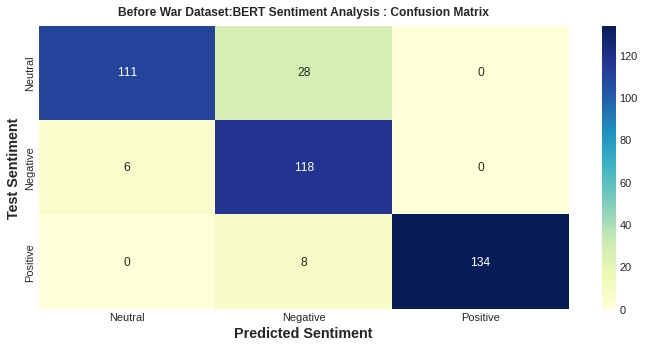

In [207]:
cf_matrix = confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1))
df_cm = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(10, 5))
ax = sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
ax.set_ylabel('Test Sentiment')
ax.set_xlabel('Predicted Sentiment')
ax.set_title("Before War Dataset:BERT Sentiment Analysis : Confusion Matrix", size=12)

### **Classification Report**

In [208]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Neutral', 'Negative', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

     Neutral       0.95      0.80      0.87       139
    Negative       0.77      0.95      0.85       124
    Positive       1.00      0.94      0.97       142

   micro avg       0.90      0.90      0.90       405
   macro avg       0.90      0.90      0.90       405
weighted avg       0.91      0.90      0.90       405
 samples avg       0.90      0.90      0.90       405



After model training through BERT, we found that the positive sentiment count were more befor the war which is true in real scenario. Hence, our BERT model performed well and gave the best results of accuracy.

## **Conclusion**

As a part of the War sentiment analysis we have tried ddifferent approaches as follows:
1. After the data processing and labeling of all three datasets we found that:<br>
    a) In before war dataset the neutral and negative sentiment counts were more.<br>
    b) Following the same in during war dataset, we found that during the war the negative count was far more than the positive and neutral. <br>
    c) In combined dataset the neutral count was more than negative and positive. And as per the study these countries were neutral about the war due to the business relations with Russia.<br>
2. After applying pipeline we found of 6 models we found that the Decision Tree Classifier outperformed among every other models with accuracy more than 85% in all the three datasets.
3. To further analysis, we delve into depp learning apprach and tried to find out the sentiments accuracy through tensorflow and keras but couldn't find the better accuracy.
4. At last we applied transformer approach for the sentiment analysis to a section of our data. Surprisingly, we got the best results using transformer. We applied BERT model for model training and got the accuracy more than 93% with 4 epochs which was way better the models we used in pipeline.

To conclude the Sentiment analysis of Russia Ukraine War, we can say that using transformers we got the best accuracy when we used the BERT model on the section of our data.

## **Future Work**


For further analysis, we can apply the BERT model in the remaining section of the data. Also, we can test the accuracy using the upgarded version of BERT which is Roberta.